# Install & Import Required packages/libraries

In [ ]:
!pip install gym
!git clone https://github.com/jakevdp/JSAnimation 
%cd JSAnimation 
!python setup.py install

!apt-get install python-opengl -y 
!apt install xvfb -y 
!pip install pyvirtualdisplay
!pip install pyglet 
!pip install matplotlib==2.0
%cd ..

In [1]:
import gym
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

from gym.wrappers import Monitor
import glob, io, base64
from IPython.display import HTML, display

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

from pyvirtualdisplay import Display
Display().start()


# download and upload https://drive.google.com/open?id=1k8zmU1xTlABgAhjHM9A43zqq3Jtu_I4x

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 496 kB of archives.
After this operation, 5,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 496 kB in 1s (452 kB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 145605 files and directories currently installed.)
Preparing to unpack .../python-opengl_3.1.0+dfsg-1_all.deb ...
Unpacking python-opengl (3.1.0+dfsg-1) ...
Setting up python-opengl (3.1.0+dfsg-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The 

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1024x768x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
import gym
env = gym.make("MountainCarContinuous-v0")
obs = env.reset


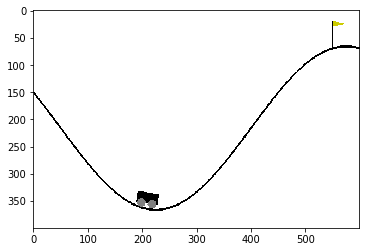

In [5]:
obs_img = env.render(mode='rgb_array')
plt.imshow(obs_img)
plt.show()

In [17]:
env = wrap_env(gym.make("MountainCarContinuous-v0"))
obs = env.reset()
total_reward = 0
frames = []
for t in range(10000):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    total_reward += reward
    if done:
        break
env.close()
print('Total Reward : %.2f'%total_reward)
show_video()

Total Reward : -33.92


In [14]:
obs

array([-0.47406713,  0.        ])

# Behavior Clonning 

# Pendulum Example

### Load data from pickle file

Data file has (s,a) pairs

In [0]:
envname = "Pendulum-v0"

# Load demonstrations
demo_file = open('./'+envname+'_expert_demo.pkl', 'rb')
demonstrations = pickle.load(demo_file)
demonstrations = shuffle(demonstrations)

# Check expert's performance
exp_ret = np.mean([np.sum(d['rewards']) for d in demonstrations])
print('Expert\'s Average Cumulative Rewards {:.3f}'.format(exp_ret))

demo_observes = []
demo_actions = []
for demonstration in demonstrations:
    for obs in demonstration['observes']:
        demo_observes.append(obs)
    for act in demonstration['actions']:
        demo_actions.append(act)
demo_observes=np.asarray(demo_observes)
demo_actions=np.asarray(demo_actions)

demo_observes, demo_actions = shuffle(demo_observes, demo_actions)

demo_observes = demo_observes[:500, :]
demo_actions = demo_actions[:500, :]

### Print the shape of data
### Find observation dimension and action dimension

In [0]:
obs_dim = (A)
act_dim = (B)

print("Observation data has shape {}".format(demo_observes.shape))
print("Action data has shape {}".format(demo_actions.shape))

(A) demo_observes.shape[1]

(B) demo_actions.shape[1]

### Run Gaussian Process Regression

In [0]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(1e4, (1e-2, 1e6))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)


demo_obs_mean = (A)
demo_obs_std = (B)
nz_demo_observes = (C)


gpr = gp.fit(nz_demo_observes, demo_actions)

(A) np.mean(demo_observes,axis=0, keepdims=True)

(B) np.std(demo_observes,axis=0, keepdims=True)

(C) (demo_observes - demo_obs_mean) / demo_obs_std

### Test GPR controller!

In [0]:
env = wrap_env(gym.make(envname))
obs = env.reset()
obs = np.reshape(obs, [1, -1])
total_reward = 0
frames = []
for t in range(10000):
    # Render into buffer. 
    nz_obs = (A)
    action = (B)
    obs, reward, done, info = env.step(action)
    obs = np.reshape(obs, [1, -1])
    total_reward += reward
    if done:
        break
env.close()
print('Total Reward : %.2f'%total_reward)
show_video()

(A) (obs - demo_obs_mean) / demo_obs_std

(B) gp.predict(nz_obs)